# Top Languages Over the Years
I downloaded and cleaned the last 3 Stack Overflow surveys 😮‍💨
Is Python going to overcome the other ones by the next year? Let's see

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
specific_col = ['WorkedLanguage', 'TargetLanguage']

In [4]:
df = pd.read_pickle('../../data/interim/interest_SO_survey_2023.pkl')

In [5]:
df_2023 = df[specific_col]

In [6]:
df_2023.shape

(87981, 2)

Perfect. For my purpose, I just only want to select the WorkedLanguage to save space in memory

Ok, but why just only visualize the WorkedLanguage's? Let's implement the Target Languages to every year

In [7]:
df_2022 = pd.read_csv('../../data/external/2022_SO_Insights.csv', usecols=specific_col)
df_2021 = pd.read_csv('../../data/external/2021_SO_Insights.csv', usecols=specific_col)
df_2020 = pd.read_csv('../../data/external/2020_SO_Insights.csv', usecols=specific_col)


In [8]:
print(df_2023.shape)
print(df_2022.shape)
print(df_2021.shape)
print(df_2020.shape)

(87981, 2)
(73268, 2)
(83439, 2)
(64461, 2)


The difference on data counts will not matter I think

In [10]:
df_2020['WorkedLanguage'].str.split(';').explode().value_counts().nlargest(10)

WorkedLanguage
JavaScript               38822
HTML/CSS                 36181
SQL                      31413
Python                   25287
Java                     23074
Bash/Shell/PowerShell    18980
C#                       18041
PHP                      15007
TypeScript               14578
C++                      13707
Name: count, dtype: int64

In [11]:
df_2023['WorkedLanguage'].str.split(';').explode().value_counts().nlargest(10)

WorkedLanguage
JavaScript                 55711
HTML/CSS                   46396
Python                     43158
SQL                        42623
TypeScript                 34041
Bash/Shell (all shells)    28351
Java                       26757
C#                         24193
C++                        19634
C                          16940
Name: count, dtype: int64

For my purpose, I will use the top 10 Languages in 2023 cuz they are the actual top languages. Those are the same in the Target Languages as Worked Languages

In [12]:
TopLanguages_2023 = df_2023['WorkedLanguage'].str.split(';').explode().value_counts().nlargest(10).index

In [13]:
def best_actual_languages(col):
    exploded = col.str.split(';').explode()
    return exploded[exploded.isin(TopLanguages_2023)].value_counts()

In [14]:
best_actual_languages(df_2020['WorkedLanguage'])

WorkedLanguage
JavaScript    38822
HTML/CSS      36181
SQL           31413
Python        25287
Java          23074
C#            18041
TypeScript    14578
C++           13707
C             12487
Name: count, dtype: int64

In [15]:
a = best_actual_languages(df_2020['WorkedLanguage'])
b = best_actual_languages(df_2021['WorkedLanguage'])
c = best_actual_languages(df_2022['WorkedLanguage'])
d = best_actual_languages(df_2023['WorkedLanguage'])

In [16]:
c

WorkedLanguage
JavaScript    46443
HTML/CSS      39142
SQL           35127
Python        34155
TypeScript    24752
Java          23644
C#            19883
C++           16024
C             13692
Name: count, dtype: int64

In [17]:
Worked_df = pd.concat([a,b,c,d], axis=1)

In [18]:
Worked_df.columns = ['2020','2021','2022','2023']

In [22]:
Worked_df.index

Index(['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'C#', 'TypeScript',
       'C++', 'C', 'Bash/Shell (all shells)'],
      dtype='object', name='WorkedLanguage')

In [19]:
Worked_df

,2020,2021,2022,2023
WorkedLanguage,,,,
JavaScript,38822.0,53587.0,46443.0,55711
HTML/CSS,36181.0,46259.0,39142.0,46396
SQL,31413.0,38835.0,35127.0,42623
Python,25287.0,39792.0,34155.0,43158
Java,23074.0,29162.0,23644.0,26757
C#,18041.0,22984.0,19883.0,24193
TypeScript,14578.0,24909.0,24752.0,34041
C++,13707.0,20057.0,16024.0,19634
C,12487.0,17329.0,13692.0,16940


In [20]:
Worked_df.loc['JavaScript']

2020    38822.0
2021    53587.0
2022    46443.0
2023    55711.0
Name: JavaScript, dtype: float64

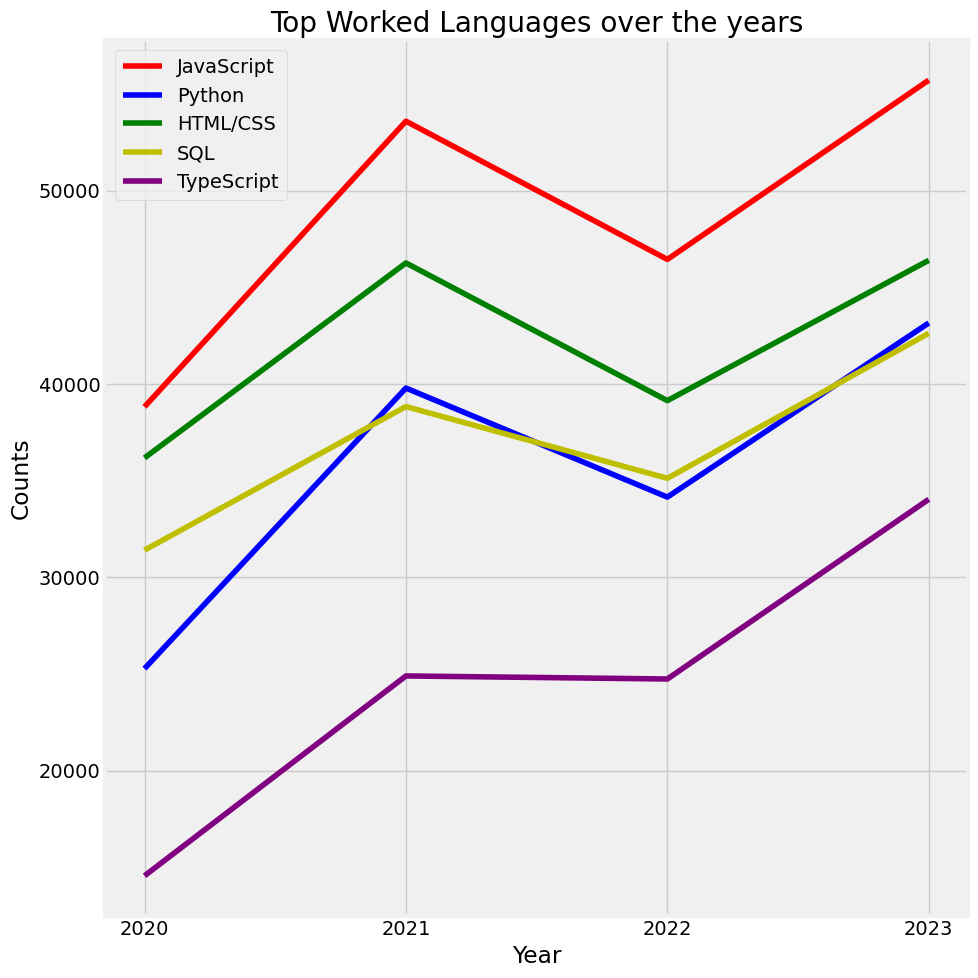

In [21]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['JavaScript'], c='r', label= 'JavaScript')
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['Python'], c='b', label='Python')
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['HTML/CSS'], c='g', label='HTML/CSS')
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['SQL'], c='y', label='SQL')
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['TypeScript'], c='purple', label= 'TypeScript')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Top Worked Languages over the years')
plt.tight_layout()
plt.show()

In [21]:
e = best_actual_languages(df_2020['TargetLanguage'])
f = best_actual_languages(df_2021['TargetLanguage'])
g = best_actual_languages(df_2022['TargetLanguage'])
h = best_actual_languages(df_2023['TargetLanguage'])

In [22]:
Target_df = pd.concat([e,f,g,h], axis=1)
Target_df.columns = ['2020','2021','2022','2023']

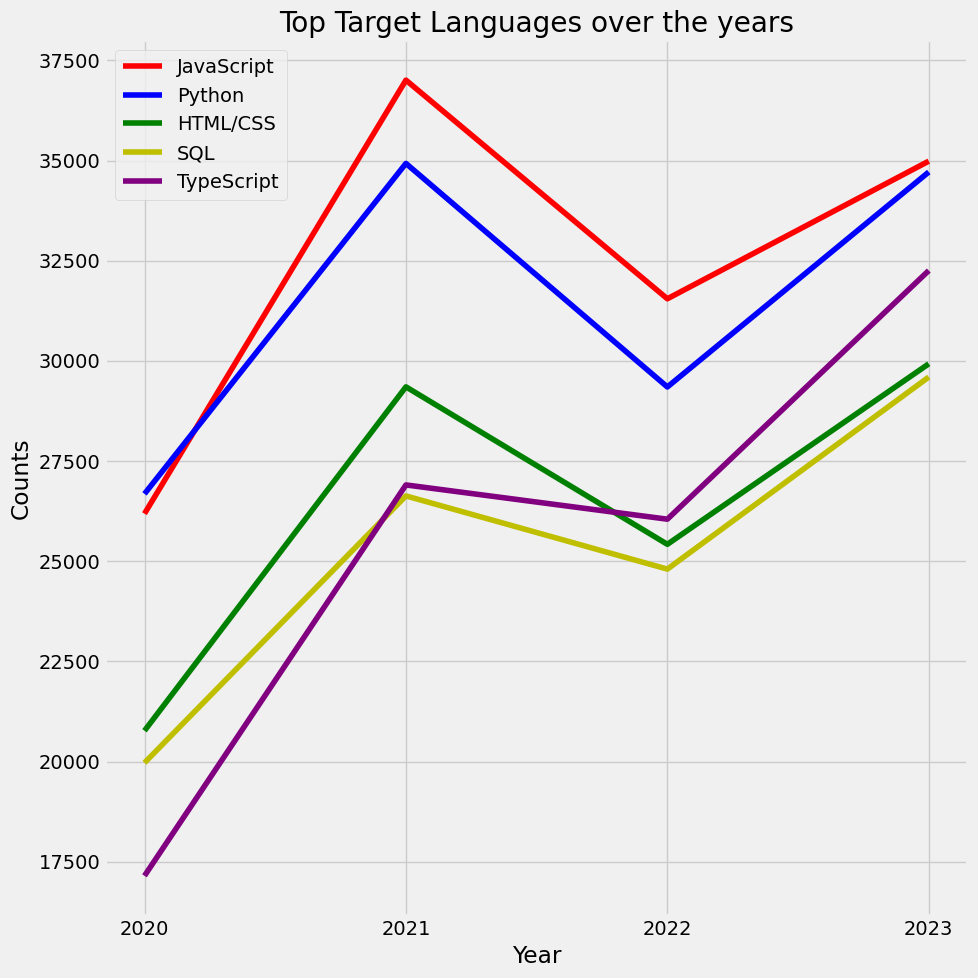

In [23]:
plt.figure(figsize=(10,10))
sns.lineplot(x=Target_df.columns, y=Target_df.loc['JavaScript'], c='r', label= 'JavaScript')
sns.lineplot(x=Target_df.columns, y=Target_df.loc['Python'], c='b', label='Python')
sns.lineplot(x=Target_df.columns, y=Target_df.loc['HTML/CSS'], c='g', label='HTML/CSS')
sns.lineplot(x=Target_df.columns, y=Target_df.loc['SQL'], c='y', label='SQL')
sns.lineplot(x=Target_df.columns, y=Target_df.loc['TypeScript'], c='purple', label= 'TypeScript')
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Top Target Languages over the years')
plt.tight_layout()
plt.show()

Perfect! Just to finish, I think I will stack them in the same figure together, to analize them better.

In [24]:
Target_df.describe()

,2020,2021,2022,2023
count,5.000000,5.000000,5.000000,5.000000
mean,22152.200000,30965.200000,27435.600000,32296.600000
std,4138.190571,4745.967889,2893.838679,2548.327255
min,17150.000000,26631.000000,24804.000000,29598.000000
25%,19970.000000,26905.000000,25423.000000,29928.000000
50%,20771.000000,29353.000000,26050.000000,32256.000000
75%,26188.000000,34929.000000,29350.000000,34715.000000
max,26682.000000,37008.000000,31551.000000,34986.000000


In [25]:
Worked_df.describe()

,2020,2021,2022,2023
count,5.000000,5.000000,5.000000,5.000000
mean,29256.200000,40676.400000,35923.800000,44385.800000
std,9686.501881,10614.057132,7899.098664,7809.143724
min,14578.000000,24909.000000,24752.000000,34041.000000
25%,25287.000000,38835.000000,34155.000000,42623.000000
50%,31413.000000,39792.000000,35127.000000,43158.000000
75%,36181.000000,46259.000000,39142.000000,46396.000000
max,38822.000000,53587.000000,46443.000000,55711.000000


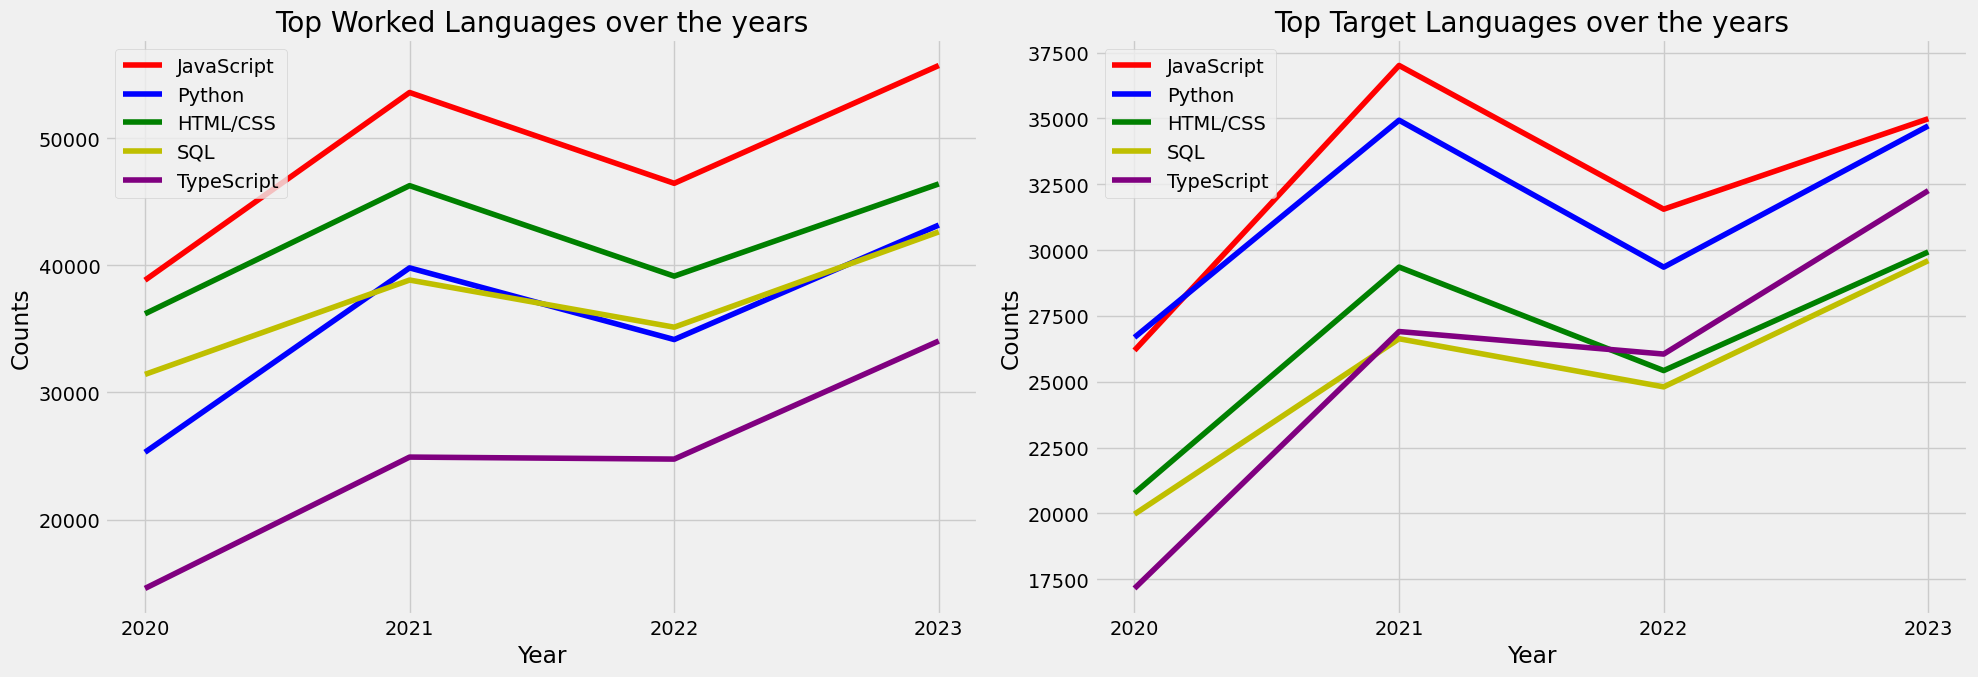

In [26]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(1, 2, 1)

sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['JavaScript'], c='r', label= 'JavaScript', ax=ax1)
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['Python'], c='b', label='Python', ax=ax1)
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['HTML/CSS'], c='g', label='HTML/CSS', ax=ax1)
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['SQL'], c='y', label='SQL', ax=ax1)
sns.lineplot(x=Worked_df.columns, y=Worked_df.loc['TypeScript'], c='purple', label= 'TypeScript', ax=ax1)
ax1.legend(loc='upper left')
ax1.set_xlabel('Year')
ax1.set_ylabel('Counts')
ax1.set_title('Top Worked Languages over the years')

ax2 = fig.add_subplot(1,2,2)
sns.lineplot(x=Target_df.columns, y=Target_df.loc['JavaScript'], c='r', label= 'JavaScript', ax=ax2)
sns.lineplot(x=Target_df.columns, y=Target_df.loc['Python'], c='b', label='Python', ax=ax2)
sns.lineplot(x=Target_df.columns, y=Target_df.loc['HTML/CSS'], c='g', label='HTML/CSS', ax=ax2)
sns.lineplot(x=Target_df.columns, y=Target_df.loc['SQL'], c='y', label='SQL', ax=ax2)
sns.lineplot(x=Target_df.columns, y=Target_df.loc['TypeScript'], c='purple', label= 'TypeScript', ax=ax2)
ax2.legend(loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('Counts')
ax2.set_title('Top Target Languages over the years')
plt.tight_layout()
plt.show()

Perfect! This is awesome, isn't it?? <3 :D!!

I have to make some conclusions about this notebook:
1. There are like 25% more respondents on Worked Language than Target Language in average. 
2. Javascript has been the most worked and target language over the years, but it seems that the people want to learn Python more this year, the target python slope 2022-2023 is higher
3. I think that SQL and HTML/CSS are the less target languages, but they are higher in worked languages because they are the easier ones to learn. One for databases, and the other for frontend web design.
4. What's Typescript and why it is growing so fast!? I did not even hearded about it. It has the biggest slope over all languages.
5. It might seem that the graph decreases in 2022, but it is because that survey had fewer respondents.

### I asked ChatGPT about Typescript and it was the answer:
> what's typescript and why it is growing so fast?

**Response:**  
TypeScript is a programming language developed and maintained by Microsoft. It is a superset of JavaScript, which means that any valid JavaScript code is also valid TypeScript code. However, TypeScript extends JavaScript by adding optional static typing, as well as other features like interfaces, classes, enums, and decorators. These additional features make it a more powerful and structured language compared to JavaScript.

Here are some key features of TypeScript:
1. Static Typing: TypeScript allows you to explicitly specify data types for variables, function parameters, and return types. This helps catch type-related errors at compile-time, making the code more robust and easier to maintain
2. Tooling Support: TypeScript is well-supported by modern development tools like code editors (e.g., Visual Studio Code), build systems, and integrated development environments (IDEs). The type information provided by TypeScript enables better autocompletion, code navigation, and error checking in these tools.
3. ES6+ Support: TypeScript supports all the latest ECMAScript standards (ES6, ES7, etc.) while providing additional features that might not be available in some JavaScript environments.
4. Optional Types: TypeScript allows you to gradually adopt static typing, as types can be declared explicitly or inferred automatically by the compiler. This flexibility makes it easier for developers to transition from JavaScript to TypeScript incrementally.

As for why TypeScript is growing rapidly in popularity, several factors contribute to its adoption:
1. Strong Type System: The static typing feature of TypeScript helps catch bugs early in the development process, improving code quality and maintainability
2. Improved Developer Productivity: TypeScript's tooling support, including code navigation, autocompletion, and refactoring tools, enhances developer productivity and reduces development time.
3. Enhanced Collaboration: The type annotations and interfaces in TypeScript serve as clear documentation for the codebase, facilitating better communication and collaboration among developers.
4. Popularity in Frameworks and Libraries: Many popular JavaScript frameworks and libraries, such as Angular, React, and Vue.js, offer TypeScript support out of the box. This has encouraged developers to adopt TypeScript when working with these technologies.
5. Corporate Backing: Being developed and maintained by Microsoft, TypeScript enjoys strong corporate backing and continuous improvement, which further contributes to its growth.

Overall, TypeScript's combination of static typing, modern tooling support, and flexibility has made it an attractive choice for many developers and organizations, leading to its rapid growth in recent years.



So, Typescript will replace Javascript, isn't it? :o  
Anyway, There is still not the right time to learn JavaScript or TypeScript
# This its all. Thank you for reading this n.n